In [2]:
from coare35vn import *
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import xarray as xr
%matplotlib inline

In [5]:
dirLoc = '/vortexfs1/share/seolab/srai/observation/'

ds_WIND = Dataset(dirLoc + 'SatelliteVsBuoy/downloads/Buoy/mergedTAO_Bouy2000/T0N140W_2000.nc')
ds_SST = Dataset(dirLoc + 'SatelliteVsBuoy/downloads/Buoy/mergedTAO_Bouy2000/TAO_T0N140W_SST_2000.nc')
ds_AIRT = Dataset(dirLoc + 'SatelliteVsBuoy/downloads/Buoy/mergedTAO_Bouy2000/TAO_T0N140W_AIRT_2000.nc')
ds_RH = Dataset(dirLoc + 'SatelliteVsBuoy/downloads/Buoy/mergedTAO_Bouy2000/TAO_T0N140W_RH_2000.nc')

In [6]:
cdfTime = ds_WIND.variables['TIME']
timeUnit = cdfTime.units
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit)
wind_dateTimeArr = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes]


cdfTime = ds_RH.variables['TIME']
timeUnit = cdfTime.units
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit)
rh_dateTimeArr = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes]

cdfTime = ds_SST.variables['TIME']
timeUnit = cdfTime.units
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit)
sst_dateTimeArr = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes]


cdfTime = ds_AIRT.variables['TIME']
timeUnit = cdfTime.units
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit)
airt_dateTimeArr = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes]



speed = np.array(ds_WIND.variables['WSPD'])
uspeed = np.array(ds_WIND.variables['UWND'])
vspeed = np.array(ds_WIND.variables['VWND'])
rh = np.array(ds_RH.variables['RELH'])
sst = np.array(ds_SST.variables['SST'])
airt = np.array(ds_AIRT.variables['AIRT'])

print(
    '\n speed', len(speed), speed.dtype,
    '\n uspeed', len(uspeed), uspeed.dtype,
    '\n vspeed', len(vspeed), vspeed.dtype,
    '\n rh', len(rh), rh.dtype,
    '\n sst', len(sst), sst.dtype,
    '\n airt', len(airt), airt.dtype)

max(len(speed), len(rh), len(sst), len(airt))


 speed 52463 float32 
 uspeed 52463 float32 
 vspeed 52463 float32 
 rh 52463 float32 
 sst 52538 float32 
 airt 52463 float32


52538

In [7]:
ds_WIND.variables.keys()

dict_keys(['TIME', 'HEIGHT', 'LATITUDE', 'LONGITUDE', 'WDIR', 'WDIR_QC', 'WDIR_DM', 'WSPD', 'WSPD_QC', 'WSPD_DM', 'UWND', 'VWND'])

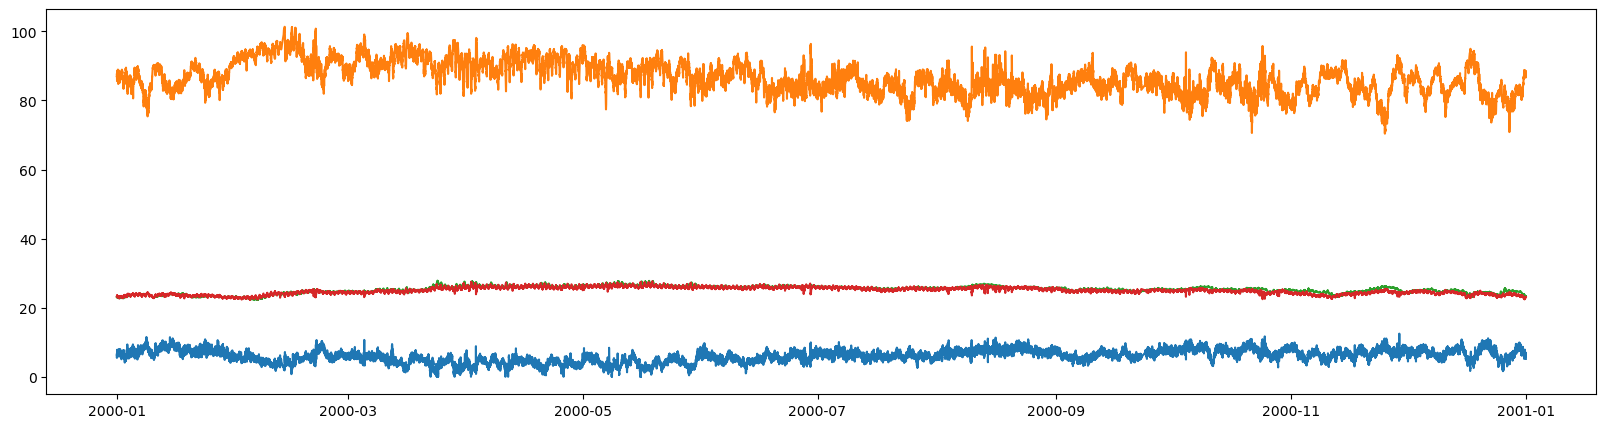

In [8]:
st = 0
ed = len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr[st:ed], speed[st:ed])
plt.plot(wind_dateTimeArr[st:ed], rh[st:ed])
plt.plot(wind_dateTimeArr[st:ed], sst[st:ed])
plt.plot(wind_dateTimeArr[st:ed], airt[st:ed])

In [9]:
timeList = []

deltaT = timedelta(minutes=10)
starttime = datetime(2000, 1, 1, 0, 0)
endtime = datetime(2001, 1, 1, 0, 0)
curtime = starttime

while curtime <= endtime:
    timeList.append(curtime)
    curtime+=deltaT
    
nanArr = np.ones(len(timeList), dtype=float)

In [10]:
len(timeList)

52705

In [11]:
def fillData(date1, date2, arr1, arr2):
    
    len1 = len(date1)
    len2 = len(date2)
    
    loop = True
    
    i = 0
    j = 0
    
    while loop:
        if date1[i] < date2[j]:
            #print(1)
            #print('date1 ', date1[i], '\n date2', date2[j], '\n i,j',i,j)
            
            dateval = date1[i]
            arrval = float('nan')
            
            index = j
            date2.insert(index, dateval)
            arr2 = np.insert(arr2, index, arrval)
            
            #print('after adding in date2')
            #print('date1 ', date1[i], '\n date2', date2[j], '\n i,j',i,j, '\n')
            
        elif date1[i] > date2[j]:
            #print(2)
            #print('date1', date1[i], '\n date2', date2[j], '\n i,j',i,j)
            
            dateval = date2[j]
            arrval = float('nan')
            
            index = i
            date1.insert(index, dateval)
            arr1 = np.insert(arr1, index, arrval)
            
            #print('after adding in date1')
            #print('date1 ', date1[i], '\n date2', date2[j], '\n i,j',i,j, '\n')
            
        else:
            i+=1
            j+=1
            
            
        if j >= len(date2)-1:
            print('ending', i, j, date1[i-1], date2[j-1])
            loop = False
            
        
        
    return date1, date2, arr1, arr2

In [12]:
wind_dateTimeArr1 = wind_dateTimeArr.copy()
wind_dateTimeArr2 = wind_dateTimeArr.copy()
wind_dateTimeArr3 = wind_dateTimeArr.copy()

wind_dateTimeArr1, timeList, uspeed, nanArr = fillData(wind_dateTimeArr1, timeList, uspeed, nanArr)
wind_dateTimeArr2, timeList, vspeed, nanArr = fillData(wind_dateTimeArr2, timeList, vspeed, nanArr)
wind_dateTimeArr3, timeList, speed, nanArr = fillData(wind_dateTimeArr3, timeList, speed, nanArr)
rh_dateTimeArr, timeList, rh, nanArr = fillData(rh_dateTimeArr, timeList, rh, nanArr)
sst_dateTimeArr, timeList, sst, nanArr = fillData(sst_dateTimeArr, timeList, sst, nanArr)
airt_dateTimeArr, timeList, airt, nanArr = fillData(airt_dateTimeArr, timeList, airt, nanArr)

ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00
ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00
ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00
ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00
ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00
ending 52704 52704 2000-12-31 23:50:00 2000-12-31 23:50:00


In [13]:
len(uspeed), len(vspeed), len(speed)

(52704, 52704, 52704)

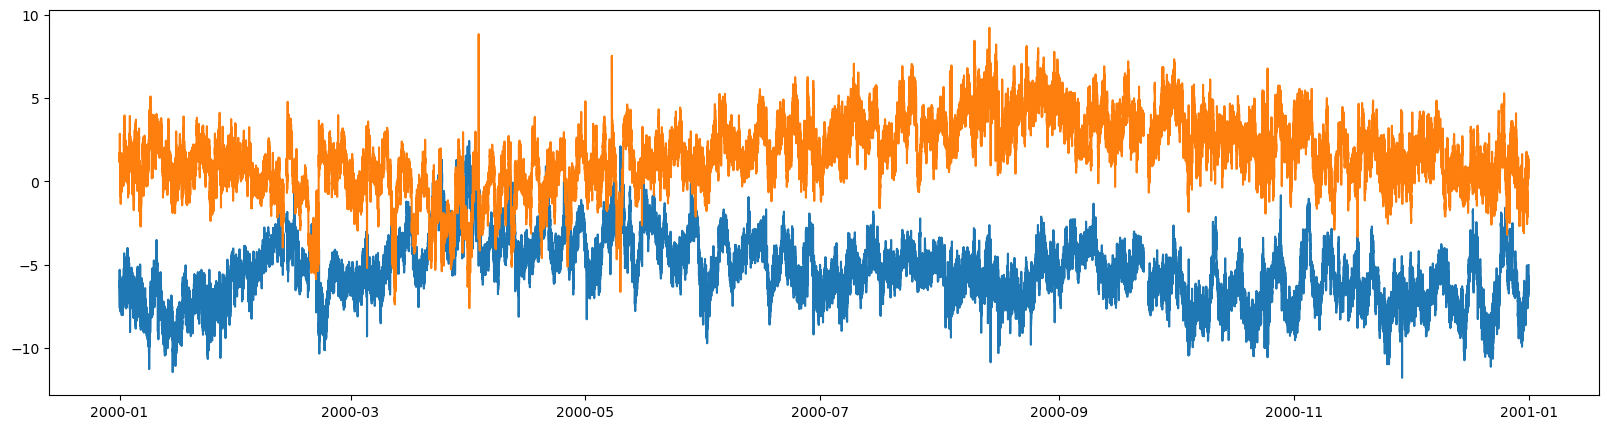

In [14]:
st = 0
ed = len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr1[st:ed], uspeed[st:ed])
plt.plot(wind_dateTimeArr1[st:ed], vspeed[st:ed])
# plt.plot(wind_dateTimeArr1[st:ed], rh[st:ed])
# plt.plot(wind_dateTimeArr1[st:ed], sst[st:ed])
# plt.plot(wind_dateTimeArr1[st:ed], airt[st:ed])

In [20]:
coareOutPutArr = coare35vn(speed, airt, rh, sst, zu=4.0)
negU  = uspeed < 0.0
negV  = vspeed < 0.0

coareOutPutArrU = coare35vn(abs(uspeed), airt, rh, sst, zu=4.0)
coareOutPutArrV = coare35vn(abs(vspeed), airt, rh, sst, zu=4.0)

coareOutPutArrU[:, negU] *=-1 
coareOutPutArrV[:, negV] *=-1 

In [21]:
#print(coareOutPutArr.shape)
U10N = coareOutPutArr[0,:]
u10 = coareOutPutArr[1,:]

U10N_x = coareOutPutArrU[0,:]
u10_x = coareOutPutArrU[1,:]

U10N_y = coareOutPutArrV[0,:]
u10_y = coareOutPutArrV[1,:]

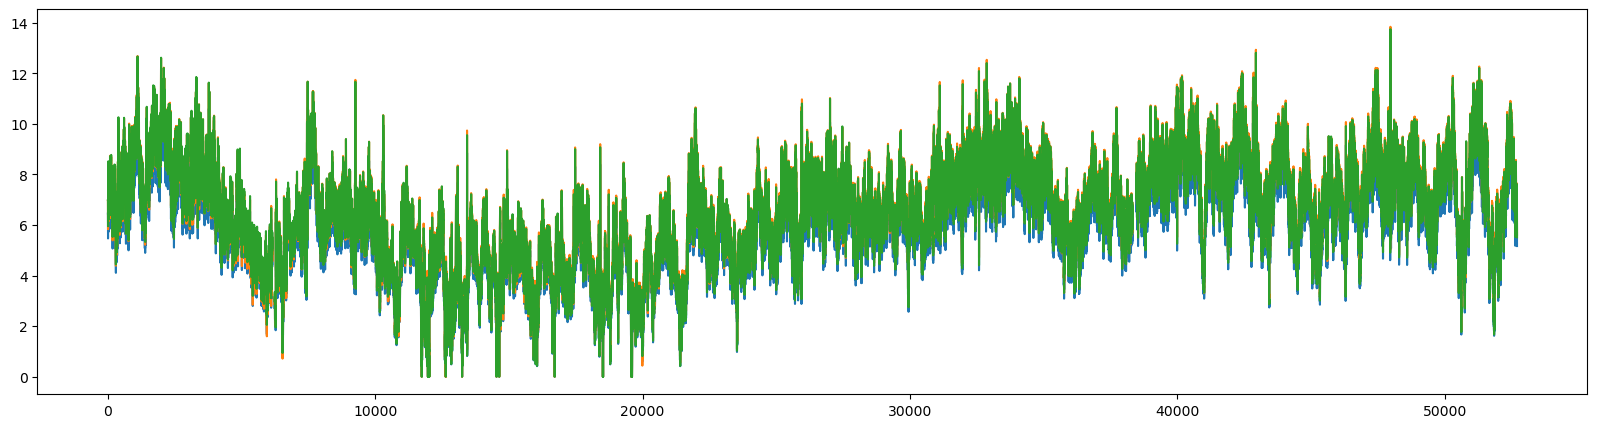

In [22]:
plt.figure(figsize=(20,5))
plt.plot(speed)
plt.plot(coareOutPutArr.T)

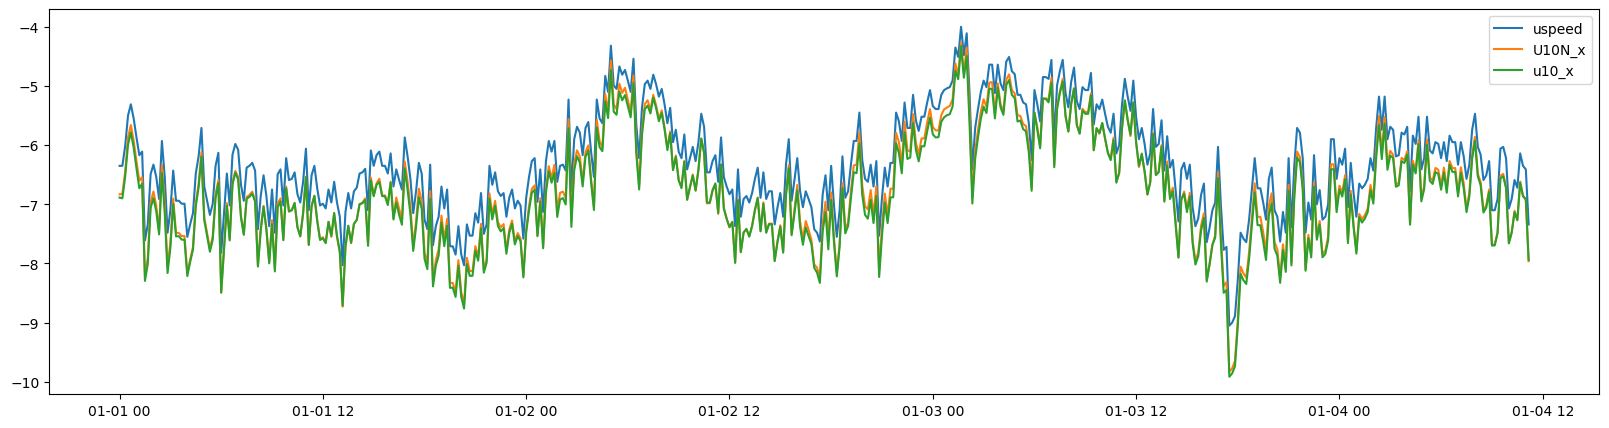

In [33]:
st = 0
ed = 500 #len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr[st:ed], uspeed[st:ed], label='uspeed')
plt.plot(wind_dateTimeArr[st:ed], U10N_x[st:ed], label='U10N_x')
plt.plot(wind_dateTimeArr[st:ed], u10_x[st:ed], label='u10_x')
#plt.plot(wind_dateTimeArr[st:ed], U10N_y[st:ed], label='U10N_y')
#plt.plot(wind_dateTimeArr[st:ed], u10_y[st:ed], label='u10_y')
plt.legend()

In [27]:
def getNormArr(arr):
    return (arr - np.nanmean(arr))/(np.nanstd(arr))

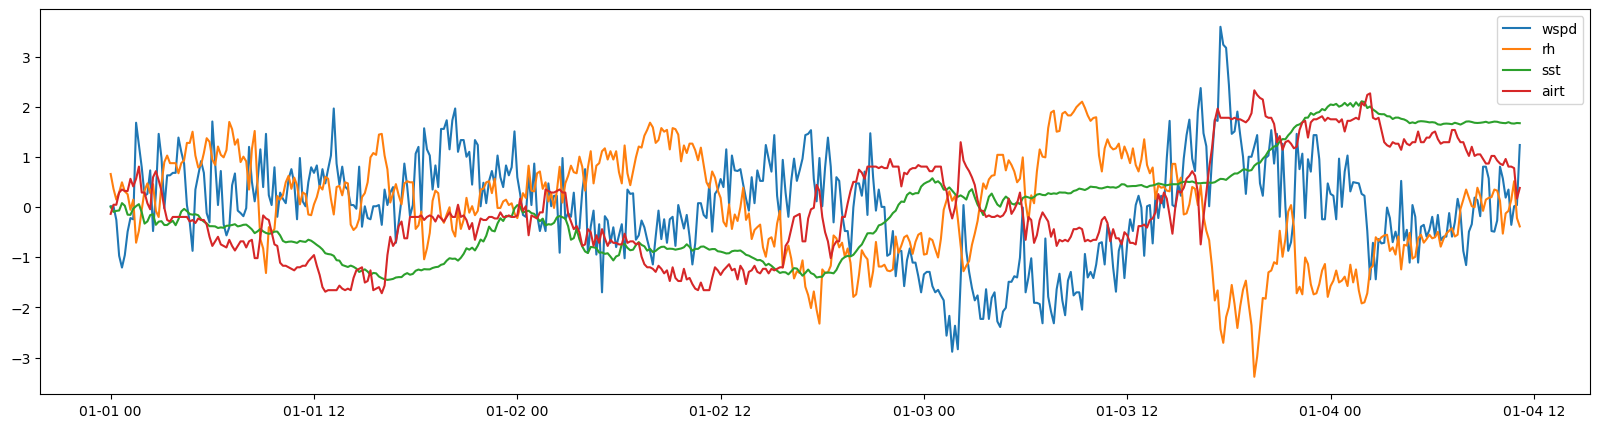

In [30]:
st = 0
ed = 500 #len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr[st:ed], getNormArr(speed[st:ed]), label = 'wspd')
plt.plot(wind_dateTimeArr[st:ed], getNormArr(rh[st:ed]), label = 'rh')
plt.plot(wind_dateTimeArr[st:ed], getNormArr(sst[st:ed]), label = 'sst')
plt.plot(wind_dateTimeArr[st:ed], getNormArr(airt[st:ed]), label = 'airt')
plt.legend()

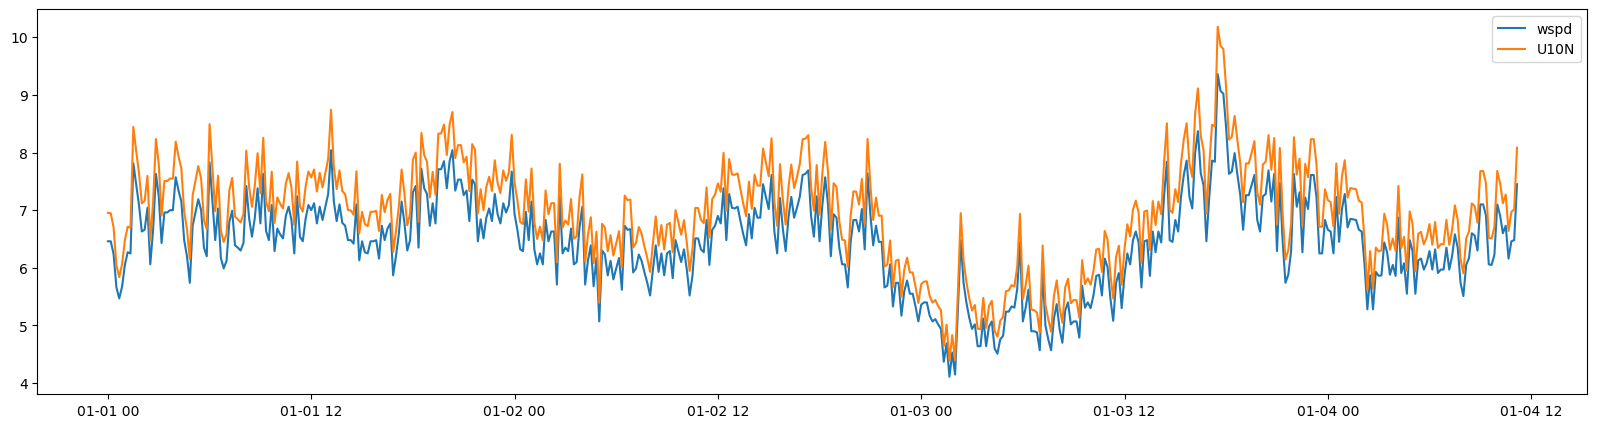

In [55]:
st = 0
ed = 500 #len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr[st:ed], speed[st:ed], label='wspd')
plt.plot(wind_dateTimeArr[st:ed], coareOutPutArr[0,st:ed], label='U10N')
#plt.plot(wind_dateTimeArr[st:ed], coareOutPutArr[1,st:ed], label='u10')
plt.legend()

In [41]:
diffU10N = U10N - speed
diffu10 = u10 - speed

diffU10N_comp = np.sqrt(U10N_x**2 + U10N_y**2) - speed
diffu10_comp = np.sqrt(u10_x**2 + u10_y**2) - speed

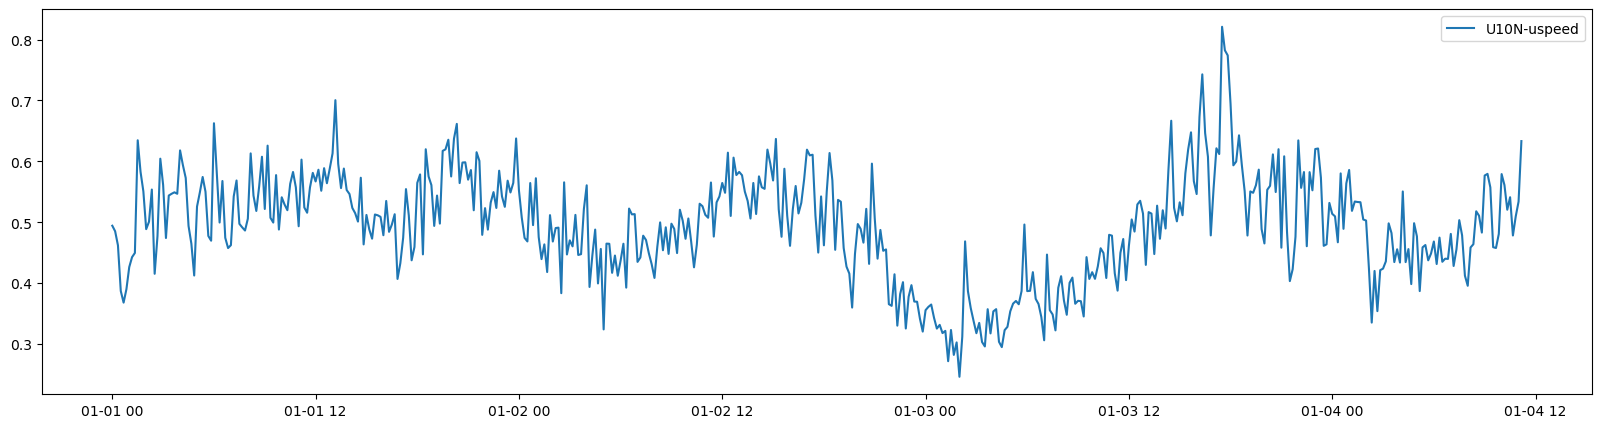

In [58]:
st = 0
ed = 500 #len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr[st:ed], diffU10N[st:ed], label = 'U10N-uspeed')
#plt.plot(wind_dateTimeArr[st:ed], diffu10[st:ed], label = 'u10-uspeed')

#plt.plot(wind_dateTimeArr[st:ed], diffU10N_comp[st:ed], linestyle = ":", label = 'U10N-uspeed compWiseCalc')
#plt.plot(wind_dateTimeArr[st:ed], diffu10_comp[st:ed], linestyle = ":", label = 'u10-uspeed compWiseCalc')

plt.legend()

In [37]:
angleOrig = np.rad2deg(np.arctan2(vspeed,uspeed))
angleU10N = np.rad2deg(np.arctan2(U10N_y,U10N_x))
angleU10 = np.rad2deg(np.arctan2(u10_y,u10_x))

In [53]:
angleDiff_U10N = angleU10N - angleOrig
angleDiff_U10 = angleU10 - angleOrig

angleDiff_U10N[abs(angleDiff_U10N) > 180] -= 360.0
angleDiff_U10[abs(angleDiff_U10) > 180] -= 360.0

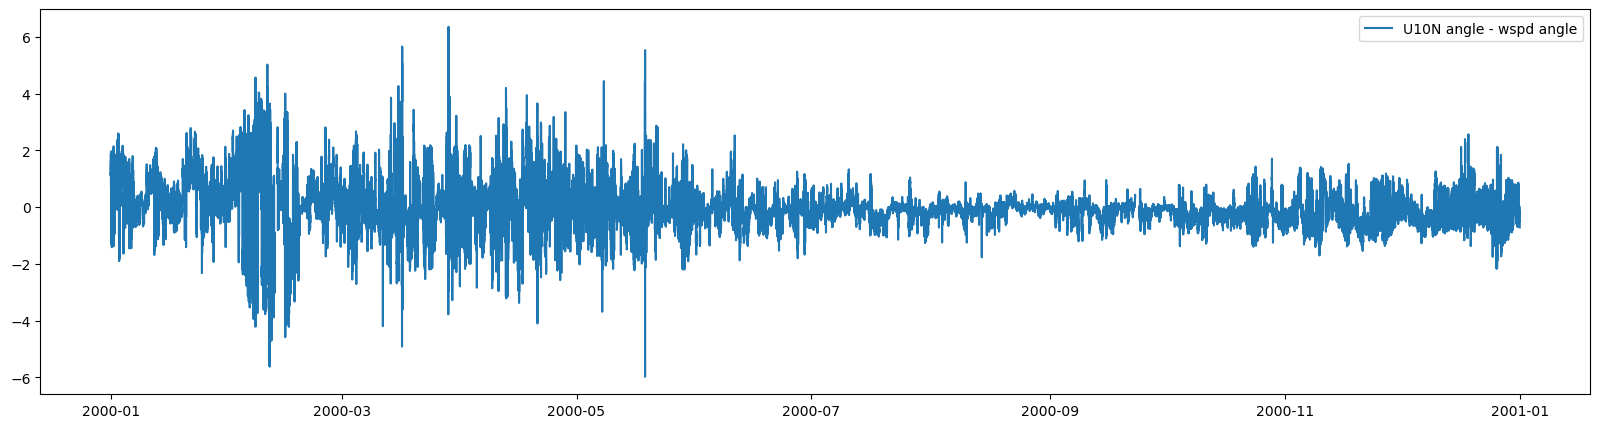

In [54]:
st = 0
ed = len(speed)
plt.figure(figsize=(20,5))
plt.plot(wind_dateTimeArr1[st:ed], angleDiff_U10N[st:ed], label = 'U10N angle - wspd angle')
#plt.plot(wind_dateTimeArr[st:ed], angleDiff_U10[st:ed], label = 'u10 angle - wspd angle')
plt.legend()